# Plotting the line of best fit
***
Once we've collected the raw data and [fit the model](../5%20Curve%20Fitting) the the data, we need to plot the model - the line of best fit - on the same axes as the data.

For example, here is some data showing the effect of [Moore's law](https://en.wikipedia.org/wiki/Moore%27s_law), which tells us that says the computer processing power doubles every 2 years.

<font color="#cccccc">Cool right? Not only it tells us technology gets twice as good every two years, but it also places a limit on how good it can get - and so far, Moore's law is followed perfectly!</font>

In [19]:
import pandas as pd  # Pandas
moore_data = pd.read_csv("../data/plotting-moore.csv")
moore_data.head(2)

,processor,transistors,year,years_since_1971,designer,process,area
0,Intel 4004,2300,1971,0,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500,1972,1,Intel,"10,000 nm",14 mm²


It doesn't matter how for the purpose of this example, but we obtain a fit representing Moore's Law:

$$ N = N_0 \times 2^{(Y-1971)/\Delta} $$

We can re-write this by taking logs (base 2) of both sides:

$$ \log_2 N = \log_2 N_0 + \frac{Y-1971}{\Delta} $$

where $N$ is the peak number of transistors in a certain year (reflecting processing power), $N_0$ is the number in year 1971 when the first commerical processor and $Y$ is the current year. $\Delta$ represents how often the processing power doubles: $\Delta=1$ means every year; $\Delta=2$ is once every two years and so on.

The fit results we get are $N_0 = 1100 \pm 200$ and $\Delta = 2.02 \pm 0.04$.

<font color="#cccccc">(So in 1971, the chips has roughly $1100$ transistors and this number doubles every $2.02$ years - consistent with the initial statement that it doubles every 2 years!)</font>

Now, we want to make a plot of the raw data and of the fit. We will do it all in one cell, so that the code is easier to see, but you don't have to! :)


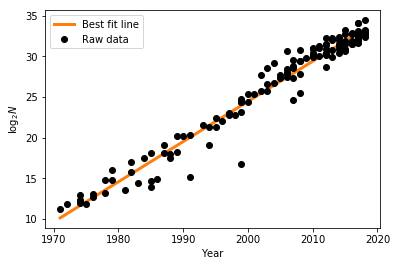

In [56]:
# Importing libraries: MatPlotLib and NumPy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

years           = moore_data["year"]          # This is our X-DATA, the current year
transistors     = moore_data["transistors"]   # This is our raw number of transistors in a chip in a current year
log_transistors = np.log2(transistors)        # This is our Y-DATA on the log plot

# Make a plot of X vs Y, with black circular markers and no connecting line
plt.errorbar( years, log_transistors, fmt="ko", label="Raw data")  

# This defines our fit function (same as above). 
# See the curve fitting tutorial and the functions tutorial for more info
def moores_law(t, N0, Delta):
    N = np.log2(N0) + (t - 1971)/Delta
    return N

# These are fit results we would have obtained from curve_fit
N0_fit    = 1100;  dN0_fit    = 200
Delta_fit = 2.02;  dDelta_fit = 0.04 

# Now we want to make a "model" data set that follows our fit.
# We take the same x values and calculated theoretical counts predicted by moores_law function using our fit results.
# We simply apply the function moores_law, which returns the predicted N for given parameters
log_transistors_predicted = moores_law(years, N0_fit, Delta_fit)

# Now we use plot() (not errorbar, because this is a straight line model) to plot the best fit line.
# Since the best fit line is a straight line by definition,  we connect the points with a line.
# We are also not interested in the actual predicted values, so we don't display markers for the best fit line.
plt.plot(years, log_transistors_predicted, "C1", lw=3, label="Best fit line")

# Now add axis labels and a legend
plt.xlabel("Year")
plt.ylabel(r"$\log_2 N$")   # Putting r before the string lets you use latex!
plt.legend()

## Extra notes on making the best fit line

There are a few ways you can create the theoretical  line once you have the fit results and the X-data.

#### 1. Just define 2 points and connect them!

We know that at $t = 1971$, $N = N_0 = 1100$ so we already know the first point on the line. Let's save it:

In [57]:
x1 = 1971
y1 = np.log2(1100)

As you know, you can draw a straight line through any 2 points, so we just need to figure out another one! We will need to use our fit parameters for this. For example, in year $2030$, we'll expect

In [62]:
x2 = 2030
y2 = moores_law(2030, N0_fit, Delta_fit)
print("%2.3g transistors" % 2**y2)

6.82e+11 transistors


All we need to make a straight line is some x and y data, so we can make a list `[x1, x2]` and `[y1, y2]` and just plot them.

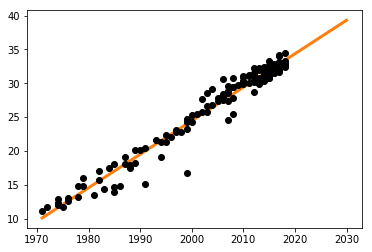

In [63]:
# Make a plot of X vs Y, with black circular markers and no connecting line
plt.errorbar( years, log_transistors, fmt="ko", label="Raw data")  

# Plot our simple line of best fit
plt.plot( [x1, x2],  [y1, y2],  "C1", lw=3, label="Best Fit")

As you can see here, you can change the **x-values** that you use for the line of best fit plot to make the line of best fit go past the raw data. We can extrapolate our line of best fit forward and backward like this.